### 1. 목표
- 버섯의 특성들을 활용해서 독/식용 버섯을 분류
- 결정트리를 시각화
- 특성선택(feature selection)

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics # 모델 평가 지표 

### 2. 데이터 수집

In [2]:
# 1. 데이터를 로드
# 2. 전체 컬럼, 행의 숫자를 파악
# 3. 결측치가 있는지 파악

In [3]:
# 1. 데이터 로드
mush = pd.read_csv("data/mushroom.csv")
mush

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
# 2. 전체 컬럼, 행의 숫자 파악
mush.shape

(8124, 23)

In [5]:
# 3. 결측치 확인
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
mush.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### 3. 데이터 전처리
- 전처리 필요 없음

### 4. 탐색적 데이터 분석(EDA)

### 5. 모델링
- 문제(X)와 정답(y)으로 분리
- 인코딩
- 학습 데이터와 정답 데이터로 분리(train_test_split 함수를 사용)

In [7]:
# 문제(X)와 정답(y)으로 분리
X = mush.loc[:, "cap-shape":"habitat"] # 혹은 loc[:, "cap-shape":]
y = mush.loc[:, "poisonous"]

#### 레이블 인코딩
- 숫자의 크고 작음에 대한 특성이 작용(0~)
- 회귀와 같이 연속된 숫자를 다루는 알고리즘에서는 1,2,3 ~ 커지는 숫자가 숫자에 따른 순서나 중요도로 인식이 될 수 있어서 제대로 예측이 불가능함
- 컴퓨터는 2진법으로 모든 데이터를 처리하기 때문에 레이블 인코딩 방식보다는 원핫 인코딩을 주로 사용

In [8]:
# cap-shape 열의 유니크한 값들만 출력
X["cap-shape"].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [9]:
# cap-shape의 유니크값들의 갯수를 확인
X["cap-shape"].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

#### 레이블 인코딩

In [10]:
# 레이블 인코딩이 진행된 후
X["cap-shape"].map({'x':0, 'f':1, 'k':2, 'b':3, 's':4, 'c':5})

0       0
1       0
2       3
3       0
4       0
       ..
8119    2
8120    0
8121    1
8122    2
8123    0
Name: cap-shape, Length: 8124, dtype: int64

In [11]:
# 레이블 인코딩이 진행되기 전
X["cap-shape"]

0       x
1       x
2       b
3       x
4       x
       ..
8119    k
8120    x
8121    f
8122    k
8123    x
Name: cap-shape, Length: 8124, dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(X['cap-shape']) # 레이블 인코더로 학습을 시킴
labels = encoder.transform(X['cap-shape']) # 학습시킨 인코더를 숫자로 변환시킴
print(labels)

[5 5 0 ... 2 3 5]


### 원 핫 인코딩
- 모든 데이터를 0과 1로 변환

In [13]:
X_one_hot = pd.get_dummies(X)
X_one_hot.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


### 모델링
- 학습 데이터와 정답 데이터로 나눔

In [14]:
# 학습 데이터와 정답 데이터로 분리(train_test_split 함수를 사용)
# 인코딩한 값을 문제 데이터로 넣어주기
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size = 0.3, random_state = 7)
X_train

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
4749,0,0,0,0,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
228,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3002,0,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
1953,0,0,0,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
7788,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
2550,0,0,0,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
537,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1220,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5686, 117)
(5686,)
(2438, 117)
(2438,)


In [16]:
# 결정트리 모델을 불러와서 학습시키고 예측해서 정확도를 확인
model = DecisionTreeClassifier()

In [17]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
pre = model.predict(X_test)
metrics.accuracy_score(pre, y_test)

1.0

In [19]:
model.score(X_test, y_test) # X_test로 학습한 결과와 y_test를 바로 비교

1.0

In [20]:
model.score(X_train, y_train)

1.0

### 시각화하기
- 외부 라이브러리인 graphviz를 설치(트리 모델을 시각화하기 위한 라이브러리)

In [21]:
!pip install graphviz

In [22]:
from sklearn.tree import export_graphviz

In [23]:
export_graphviz(model, out_file = 'data/tree.dot', # dot 파일 : 그래프 저장용 텍스트 파일 형식
               class_names = ['독', '식용'], # 클래스 이름 설정
               feature_names = X_one_hot.columns, # 원 핫 인코딩 된 데이터프레임의 컬럼명을 가져와서 특성 이름으로 지정
               impurity = False, # 지니 불순도 표시 여부
               filled= True) # True라면 노드의 클래스가 구분되도록 색을 칠해줌

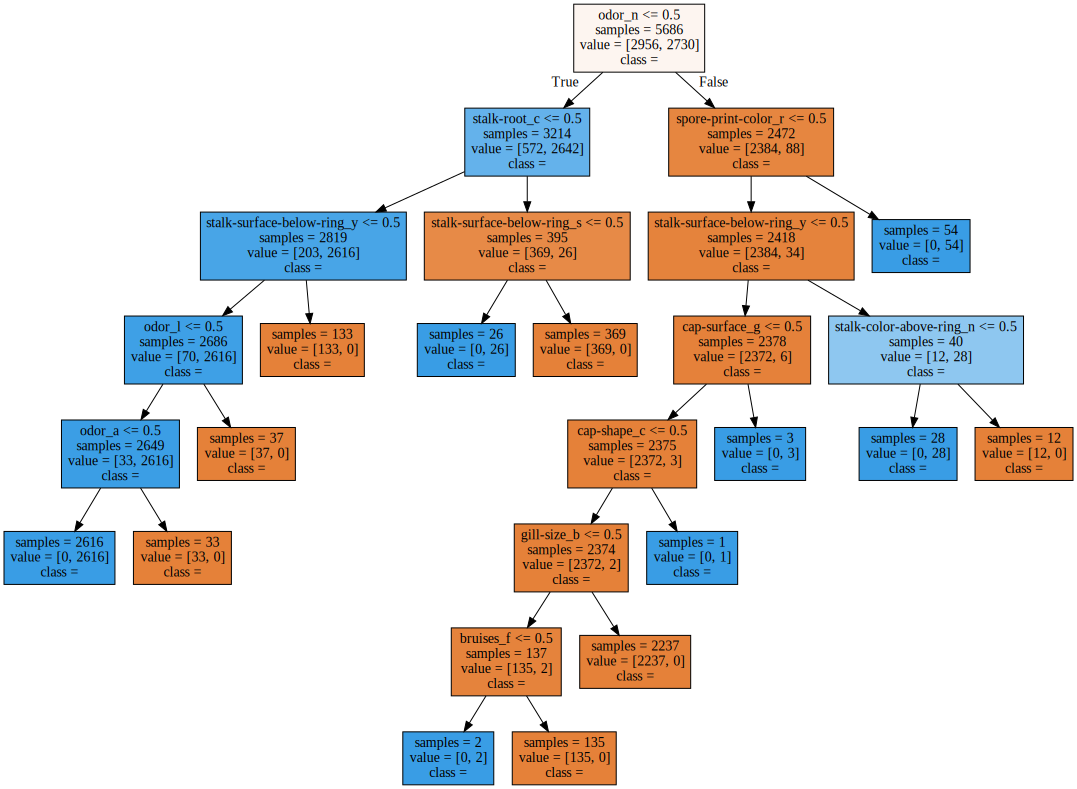

In [24]:
import graphviz

# tree.dot 파일을 불러오면서 UTF8(한글)로 변환시켜주어 f라고 지칭함
with open('data/tree.dot', encoding = 'UTF8') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

# <= 0.5 : 원 핫 인코딩 후 0, 1을 구분하는 조건
# sample : 샘플 개수
# value : 클래스 별 개수['독'의 개수, '식용'의 개수]
# class : 예측값(=label)

### 과대적합제어

In [25]:
# max_depth, max_leaf_nodes, min_sample_leaf
tree_model2 = DecisionTreeClassifier(max_depth = 1)
tree_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [26]:
export_graphviz(tree_model2, out_file = 'data/tree2.dot', # dot 파일 : 그래프 저장용 텍스트 파일 형식
               class_names = ['독', '식용'], # 클래스 이름 설정
               feature_names = X_one_hot.columns, # 원 핫 인코딩 된 데이터프레임의 컬럼명을 가져와서 특성 이름으로 지정
               impurity = False, # 지니 불순도 표시 여부
               filled= True) # True라면 노드의 클래스가 구분되도록 색을 칠해줌

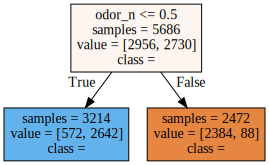

In [27]:
with open('data/tree2.dot', encoding = 'UTF8') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [28]:
tree_model2.score(X_test, y_test)

0.8933552091878589

In [29]:
tree_model2.score(X_train, y_train)

0.8839254308828702

### 특성선택(feature selection)
- tree 모델의 특성중요도(각 특성들은 0 ~ 1 사이의 중요도 값을 가짐, 모든 특성중요도의 합은 1이 됨)
- 0이 나오는 컬럼은 모델이 정답을 예측하는데 전혀 사용되지 않은 특성
- 1은 완벽하게 정답을 예측해내는 특성

In [31]:
fi = model.feature_importances_
fi # 원 핫 인코딩을 통해 생성된 모든 특성 개수인 117개

array([0.00000000e+00, 7.03112501e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.10578942e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.38861859e-03, 0.00000000e+00, 2.29619887e-02, 0.00000000e+00,
       0.00000000e+00, 2.50743114e-02, 0.00000000e+00, 6.08901883e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.93849405e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.81454492e-01, 0.00000000e+00, 0.00000000e+00,
      

In [32]:
len(fi)

117

In [33]:
X_one_hot.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [36]:
fi_df = pd.DataFrame(fi, index = X_one_hot.columns)
# by = 0 : 기준이 되는 열을 선택(이 경우 열이 하나임으로 의미 X, 값이 0인 이유는 열의 이름이 0이므로)
#ascending : 오름차순 옵션, False는 내림차순
fi_df.sort_values(by = 0, ascending = False) 

,0
odor_n,0.608902
stalk-root_c,0.181454
stalk-surface-below-ring_y,0.098180
spore-print-color_r,0.036178
odor_l,0.025074
...,...
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_n,0.000000
gill-spacing_w,0.000000
